## Who eats the food we grow?

Part 2 - training a model - linear regression - continuous features

- The world’s population is growing - how are we are going to feed this growing population?
- Worldwide distribution of food and feed between 1961-2013
- Data provided by the Food and Agriculture Organisation of the United Nations (published on Kaggle)
- 21477 records from 174 areas/regions
- Food and feed production by country and food item (1000 tonnes)
- 2 main production categories:
    - Food – total amount of food items available as human food (for local consumption)
    - Feed – total amount of food available for feeding livestock and poultry

This model focuses solely on the food production records
- 17528 records from 174 areas/regions
- 62 possible features 

In [1]:
# import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import functions_food as f

from sklearn import datasets
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# read in dataset

prod = pd.read_csv("FAO.csv", sep=",", encoding='latin-1')

In [3]:
prod.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [4]:
prod.tail()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
21472,ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZWE,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
21476,ZWE,181,Zimbabwe,2928,Miscellaneous,5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


# 1) Explain the problem you are solving and the features of the dataset

# The question: 

What is the food production (1000s tonnes) of a given food type in a given country in the year 2013?
(Can we then use this to predict future food production as well?)

# Features of the dataset:

- Area abbreviation = abbreviation  (letters) of the name of the area
- Area code =  a unique numeric code that identifies each area
- Area = the name of the area (either a country or region)
- Item code = A numeric identifier that is unique to each item described in the dataset
- Item = The name of the food or feed item the record is for.
- Element code = A numeric code that identifies the data as a food (5142) or feed (5521) record.
- Element = tells us whether the record is a food or feed record
- Unit = The unit that the production results are measured in. (each record is in 1000 tonnes)
- Latitude = Co-ordinates that identify the location of a given country/region
- Longitude = Co-ordinates that identify the location of a given country/region
- Y1961 to Y2013 = These columns contain the amount of food/feed production for the year stated (in 1000s of tonnes)

# 2) Perform EDA to gather insights

- see mini_project1 for further EDA

In [5]:
prod.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [6]:
food_prod = prod.loc[prod['Element'] == 'Food']

food_prod.shape

(17528, 63)

In [7]:
# check number of rows and columns of the data
food_prod.shape

(17528, 63)

In [8]:
food_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17528 entries, 0 to 21476
Data columns (total 63 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area Abbreviation  17528 non-null  object 
 1   Area Code          17528 non-null  int64  
 2   Area               17528 non-null  object 
 3   Item Code          17528 non-null  int64  
 4   Item               17528 non-null  object 
 5   Element Code       17528 non-null  int64  
 6   Element            17528 non-null  object 
 7   Unit               17528 non-null  object 
 8   latitude           17528 non-null  float64
 9   longitude          17528 non-null  float64
 10  Y1961              14832 non-null  float64
 11  Y1962              14832 non-null  float64
 12  Y1963              14832 non-null  float64
 13  Y1964              14832 non-null  float64
 14  Y1965              14832 non-null  float64
 15  Y1966              14832 non-null  float64
 16  Y1967              148

In [9]:
# How many countries/regions are included in the dataset?
len(food_prod['Area'].unique())

174

In [10]:
# What food and/or feed items are in the dataset?
food_prod['Item'].unique()

array(['Wheat and products', 'Rice (Milled Equivalent)',
       'Barley and products', 'Maize and products', 'Millet and products',
       'Cereals, Other', 'Potatoes and products',
       'Sugar (Raw Equivalent)', 'Sweeteners, Other', 'Honey',
       'Pulses, Other and products', 'Nuts and products',
       'Coconuts - Incl Copra', 'Sesame seed',
       'Olives (including preserved)', 'Soyabean Oil', 'Groundnut Oil',
       'Sunflowerseed Oil', 'Rape and Mustard Oil', 'Cottonseed Oil',
       'Palm Oil', 'Sesameseed Oil', 'Olive Oil', 'Oilcrops Oil, Other',
       'Tomatoes and products', 'Vegetables, Other',
       'Oranges, Mandarines', 'Citrus, Other', 'Bananas',
       'Apples and products', 'Pineapples and products', 'Dates',
       'Grapes and products (excl wine)', 'Fruits, Other',
       'Coffee and products', 'Cocoa Beans and products',
       'Tea (including mate)', 'Pepper', 'Spices, Other', 'Wine', 'Beer',
       'Beverages, Alcoholic', 'Bovine Meat', 'Mutton & Goat Meat',

In [11]:
# categorise animal and plant products

# I have defined animal products as any meat product and any product that animals produce.

# Create dictionary of food items and assign to either animal, plant or can't be confirmed from info provided:
# 0 = animal
# 1 = plant
# 2 = categories that could contain both plant and animal products

mappings = {'Item': {'Sugar Crops': 1, 'Ricebran Oil': 1, 'Wheat and products': 1, 'Rice (Milled Equivalent)': 1,
'Barley and products': 1, 'Maize and products': 1, 'Millet and products': 1, 'Cereals, Other': 1, 'Potatoes and products': 1, 
'Sugar (Raw Equivalent)': 1, 'Sweeteners, Other': 1, 'Honey': 0, 'Pulses, Other and products': 1, 'Nuts and products': 1,
'Coconuts - Incl Copra': 1, 'Sesame seed': 1, 'Olives (including preserved)': 1, 'Soyabean Oil': 1, 'Groundnut Oil': 1,
'Sunflowerseed Oil': 1, 'Rape and Mustard Oil': 1, 'Cottonseed Oil': 1, 'Palm Oil': 1, 'Sesameseed Oil': 1, 'Olive Oil': 1, 
'Oilcrops Oil, Other': 1, 'Tomatoes and products': 1, 'Vegetables, Other': 1, 'Oranges, Mandarines': 1, 'Citrus, Other': 1,
'Bananas': 1, 'Apples and products': 1, 'Pineapples and products': 1, 'Dates': 1, 'Grapes and products (excl wine)': 1,
'Fruits, Other': 1, 'Coffee and products': 1, 'Cocoa Beans and products': 1, 'Tea (including mate)': 1, 'Pepper': 1,
'Spices, Other': 1, 'Wine': 1, 'Beer': 1, 'Beverages, Alcoholic': 1, 'Bovine Meat': 0, 'Mutton & Goat Meat': 0, 'Eggs': 0,
'Meat, Other': 0, 'Offals, Edible': 0, 'Poultry Meat': 0, 'Butter, Ghee': 0, 'Cream': 0, 'Fats, Animals, Raw': 0, 
'Milk - Excluding Butter': 0, 'Freshwater Fish': 0, 'Infant food': 2, 'Cereals - Excluding Beer': 1, 'Starchy Roots': 1,
'Sugar & Sweeteners': 1, 'Pulses': 1, 'Treenuts': 1, 'Oilcrops': 1, 'Vegetable Oils': 1, 'Vegetables': 1, 'Fruits - Excluding Wine': 1,
'Stimulants': 2, 'Spices': 1, 'Alcoholic Beverages': 1, 'Meat': 0, 'Offals': 0, 'Animal fats': 0, 'Fish, Seafood': 0, 'Miscellaneous': 2,
'Rye and products': 1, 'Oats': 1, 'Cassava and products': 1, 'Sweet potatoes': 1, 'Roots, Other': 1, 'Beans': 1, 'Peas': 1, 
'Soyabeans': 1, 'Groundnuts (Shelled Eq)': 1, 'Rape and Mustardseed': 1, 'Maize Germ Oil': 1, 'Onions': 1, 
'Lemons, Limes and products': 1, 'Grapefruit and products': 1, 'Plantains': 1, 'Pimento': 1, 'Beverages, Fermented': 1,
'Pigmeat': 0, 'Fish, Body Oil': 0, 'Fish, Liver Oil': 0, 'Demersal Fish': 0, 'Pelagic Fish': 0, 'Marine Fish, Other': 0, 'Crustaceans': 0,
'Cephalopods': 0, 'Molluscs, Other': 0, 'Aquatic Animals, Others': 0, 'Aquatic Plants': 1, 'Aquatic Products, Other': 2,
'Sorghum and products': 1, 'Palm kernels': 1, 'Coconut Oil': 1, 'Cloves': 1, 'Palmkernel Oil': 1, 'Yams': 1, 'Sunflower seed': 1,
'Oilcrops, Other': 1, 'Sugar cane': 1, 'Sugar non-centrifugal': 1, 'Meat, Aquatic Mammals': 0, 'Sugar beet': 1, 'Cottonseed': 1}}

col = 'Item'
food_prod['Animal_or_plant_code'] = food_prod[['Item']].apply(lambda col: col.map(mappings[col.name]))

food_prod.head()

# ref 2

/tmp/ipykernel_4444/1421982394.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_prod['Animal_or_plant_code'] = food_prod[['Item']].apply(lambda col: col.map(mappings[col.name]))


,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Animal_or_plant_code
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,1
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,1
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,1
5,AFG,2,Afghanistan,2514,Maize and products,5142,Food,1000 tonnes,33.94,67.71,...,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76,1
6,AFG,2,Afghanistan,2517,Millet and products,5142,Food,1000 tonnes,33.94,67.71,...,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12,1


In [12]:
mappings = {'Animal_or_plant_code': {0: 'Animal', 1: 'Plant', 2: 'Undetermined'}}

col = 'Animal_or_plant_code'
food_prod['Animal_or_plant_name'] = food_prod[['Animal_or_plant_code']].apply(lambda col: col.map(mappings[col.name]))

food_prod.head()

/tmp/ipykernel_4444/4007996497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_prod['Animal_or_plant_name'] = food_prod[['Animal_or_plant_code']].apply(lambda col: col.map(mappings[col.name]))


,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Animal_or_plant_code,Animal_or_plant_name
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,1,Plant
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,546.0,455.0,490.0,415.0,442.0,476.0,425,422,1,Plant
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,44.0,48.0,62.0,55.0,60.0,72.0,78,89,1,Plant
5,AFG,2,Afghanistan,2514,Maize and products,5142,Food,1000 tonnes,33.94,67.71,...,82.0,67.0,69.0,71.0,82.0,73.0,77,76,1,Plant
6,AFG,2,Afghanistan,2517,Millet and products,5142,Food,1000 tonnes,33.94,67.71,...,11.0,19.0,21.0,18.0,14.0,14.0,14,12,1,Plant


Sum up the total animal and plant product production for given year

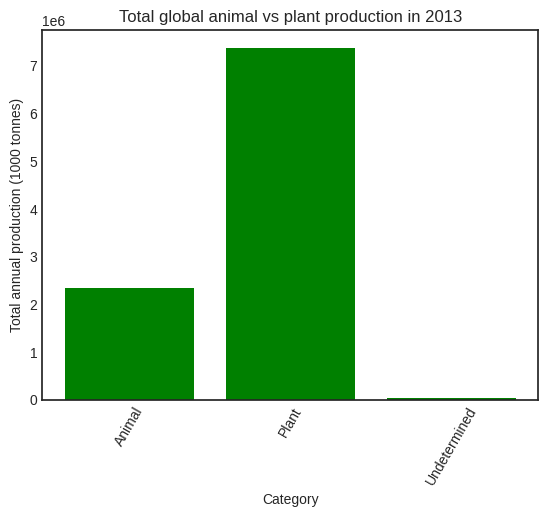

In [13]:
f.animal_or_plant(dat = food_prod)

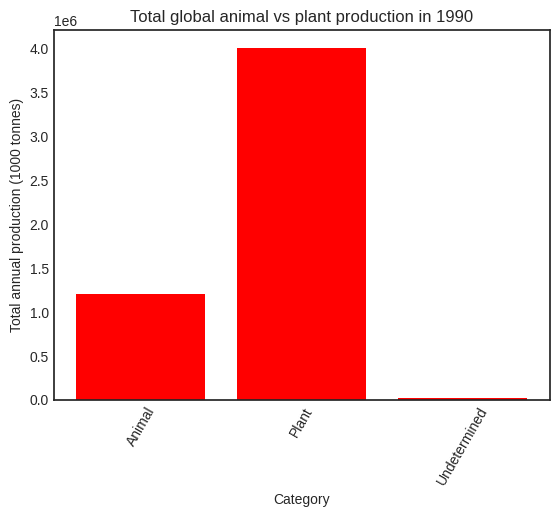

In [14]:
f.animal_or_plant(dat = food_prod, year = 'Y1990', plot_color = 'r')

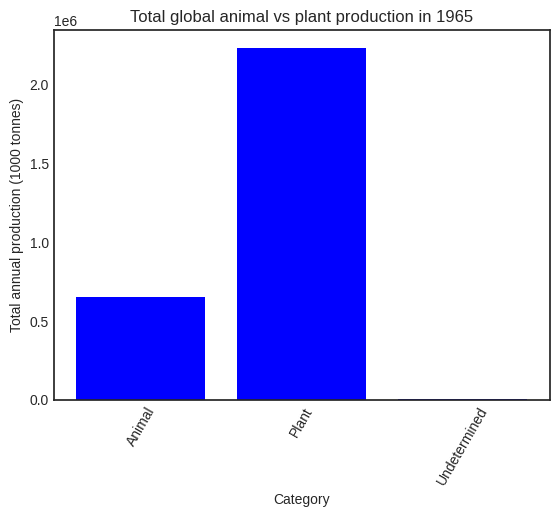

In [15]:
f.animal_or_plant(dat = food_prod, year = 'Y1965', plot_color = 'b')

# Has this changed over time?
In the first mini assignment it was found that while human food and animal feed consumption have both increased over the years, food production has increased a lot more than feed production has. By categorising food as either plant or animal based, it can be seen that plant based food production has increased a lot more than animal based food production. This helps to explain why animal feed requirements aren't keeping up with our food production as we are producing more plant based foods.

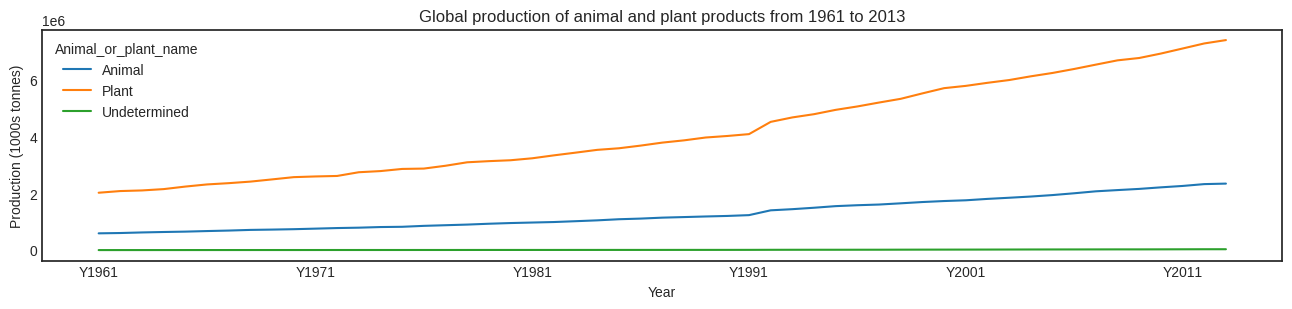

In [16]:
#### Animal products vs Plant products - global production from 1961-2013
dat = food_prod 

# Create list of all years in the dataset
dt = dat.columns.values.tolist()
year = dt[10:-2]

# Get total production of plant and animal based foods for each year
tot_prod = []
for a in year:
    dat1 = dat.groupby(by=['Animal_or_plant_name'])[year].sum().reset_index()
    tot_prod.append(dat1)

output = tot_prod[1]

df = output.set_index('Animal_or_plant_name').T

# Plot the animal and plant production for each year
global_plot = df.plot(kind = 'line', figsize=(16, 3), title='Global production of animal and plant products from\
 1961 to 2013', xlabel='Year', ylabel="Production (1000s tonnes)")

 # ref 7

In [17]:
# we have a subset of data on food (consumed by humans)
food_prod['Element'].unique()

array(['Food'], dtype=object)

In [18]:
food_prod.isnull().sum()

Area Abbreviation        0
Area Code                0
Area                     0
Item Code                0
Item                     0
                        ..
Y2011                   94
Y2012                    0
Y2013                    0
Animal_or_plant_code     0
Animal_or_plant_name     0
Length: 65, dtype: int64

# 3) Perform data pre-processing with justification

In [19]:
# Based on previous EDA
# remove outlier countries - countries where production over time follows an unusual trend - suggesting something unusual
# happening or happened in that country. (Based on EDA from Ass. 1)

a = ['Bulgaria', 'Cuba', 'Cyprus', 'Finland', 'Guyana', 'Hungary', 'Ireland',
'Netherlands', 'Paraguay', 'Poland', 'Sudan', 'Belgium', 'Montenegro']

food_prod_cleaned = food_prod[~food_prod['Area'].isin(a)]


# ref 3

In [20]:
# remove non-numerical columns - as these are mostly double ups with a numerical column also provided to describe the same thing

prod_numeric_cleaned = food_prod_cleaned.drop(['Area Abbreviation', 'Area', 'Item', 'Element', 'Element Code',
 'Unit', 'Animal_or_plant_name'], axis = 1)

prod_numeric_cleaned.head()

,Area Code,Item Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Animal_or_plant_code
0,2,2511,33.94,67.71,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,1
1,2,2805,33.94,67.71,183.0,183.0,182.0,220.0,220.0,195.0,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,1
3,2,2513,33.94,67.71,237.0,237.0,237.0,238.0,238.0,237.0,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,1
5,2,2514,33.94,67.71,403.0,403.0,410.0,415.0,415.0,413.0,...,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76,1
6,2,2517,33.94,67.71,17.0,18.0,19.0,20.0,21.0,22.0,...,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12,1


In [21]:
## Null values - cleaning up NaNs, 0s and -ves
# How many negative values in the dataset
print(f'total number of negative values: {(prod_numeric_cleaned < 0).sum().sum()}')

# how many negative production values?
print(f'number of negatives in the years columns: {(prod_numeric_cleaned[10:-2] < 0).sum().sum()}')

# total # of records in dataset

print(f'total number of records in dataset: {16220 * 58}')

# percentage -ve values

print(f'percentage of data with these incorrect -ve values: {(18897 / 940760) * 100}')

total number of negative values: 8897
number of negatives in the years columns: 8895
total number of records in dataset: 940760
percentage of data with these incorrect -ve values: 2.0086950975806794


In [22]:
# How many NaN values in the dataset
print(f'total number of NaN values: {prod_numeric_cleaned.isna().sum().sum()}')

# how many NaN production values?
print(f'number of NaN in the years columns: {prod_numeric_cleaned[10:-2].isna().sum().sum()}')

# total # of records in dataset

print(f'total number of records in dataset: {16220 * 58}')

# percentage NaN values

print(f'percentage of data with NaN values: {(76758 / 940760) * 100}')

total number of NaN values: 76758
number of NaN in the years columns: 76758
total number of records in dataset: 940760
percentage of data with NaN values: 8.159147922955908


In [23]:
# How many 0 values in the dataset
print(f'total number of 0 values: {(prod_numeric_cleaned == 0).sum().sum()}')

# how many 0 production values?
print(f'number of 0s in the years columns: {(prod_numeric_cleaned[10:-2] == 0).sum().sum()}')

# total # of records in dataset

print(f'total number of records in dataset: {16220 * 58}')

# percentage 0 values

print(f'percentage of data what are 0 values: {(287536 / 940760) * 100}')

total number of 0 values: 278639
number of 0s in the years columns: 278442
total number of records in dataset: 940760
percentage of data what are 0 values: 30.56422466941622


In [24]:
## Implementing Missing value ratio technique
# Calculate the percentage of missing data in each column and remove columns where missing data % is above given threshold
# missing = 0, NaN or negative

# change 0s and negatives to NaNs
prod_numeric_cleaned[prod_numeric_cleaned < 0] = 0
prod_numeric_NaNs = prod_numeric_cleaned.replace(0, np.nan, inplace=False)

data = prod_numeric_NaNs

# Create new dataframe
# saving missing values in a variable
a = data.isnull().sum()/len(data)*100

# saving column names in a variable
variables = data.columns

# new variable to store variables having missing values less than a threshold

variable = [ ]

for i in range(data.columns.shape[0]):
    if a[i]<=40: #setting the threshold as 40%
        variable.append(variables[i])

# creating a new dataframe using the above variables

prod_numeric_reduced_vars = data[variable]
prod_numeric_reduced_vars.head()

# code from ref 10

,Area Code,Item Code,latitude,longitude,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Animal_or_plant_code
0,2,2511,33.94,67.71,1582.0,1840.0,1855.0,1853.0,2177.0,2343.0,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810.0,4895.0,1.0
1,2,2805,33.94,67.71,249.0,218.0,260.0,319.0,254.0,326.0,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425.0,422.0,1.0
3,2,2513,33.94,67.71,120.0,155.0,143.0,125.0,138.0,159.0,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78.0,89.0,1.0
5,2,2514,33.94,67.71,170.0,272.0,289.0,310.0,209.0,173.0,...,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77.0,76.0,1.0
6,2,2517,33.94,67.71,18.0,22.0,20.0,21.0,17.0,20.0,...,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14.0,12.0,1.0


In [25]:
# See the % of missing values for each column
# Earlier years have more missing values = record keeing has improved over time - better technology, easier recording,
# greater understanding of why we record data etc

a

Area Code                0.000000
Item Code                0.000000
latitude                21.763255
longitude               33.076449
Y1961                   53.249075
Y1962                   52.866831
Y1963                   52.361282
Y1964                   52.040691
Y1965                   51.806412
Y1966                   51.374846
Y1967                   51.078915
Y1968                   50.863132
Y1969                   50.567201
Y1970                   50.234279
Y1971                   49.815043
Y1972                   49.808878
Y1973                   49.358816
Y1974                   49.044390
Y1975                   49.001233
Y1976                   48.600493
Y1977                   48.039457
Y1978                   47.651048
Y1979                   47.595561
Y1980                   47.225647
Y1981                   46.874229
Y1982                   46.695438
Y1983                   46.670777
Y1984                   46.196054
Y1985                   46.270037
Y1986         

In [26]:
# correlation matrix for selected numeric columns

prod_numeric_reduced_vars.corr(numeric_only = True)

,Area Code,Item Code,latitude,longitude,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Animal_or_plant_code
Area Code,1.000000,0.000540,0.034299,-0.060690,-0.011299,-0.014405,-0.015573,-0.017873,-0.018089,-0.018949,...,-0.022738,-0.023662,-0.024184,-0.025012,-0.025420,-0.025904,-0.027046,-0.026366,-0.026394,-0.000627
Item Code,0.000540,1.000000,0.014909,0.001397,0.065296,0.063622,0.063765,0.063804,0.063492,0.062988,...,0.058031,0.058268,0.058115,0.057020,0.057409,0.057015,0.056925,0.056912,0.056511,0.370516
latitude,0.034299,0.014909,1.000000,-0.270235,0.044450,0.039850,0.037214,0.035808,0.033772,0.033224,...,0.026297,0.024260,0.023231,0.022011,0.022247,0.020702,0.020227,0.019591,0.018867,0.001470
longitude,-0.060690,0.001397,-0.270235,1.000000,0.056774,0.058722,0.060182,0.060398,0.059532,0.060301,...,0.057018,0.056394,0.057197,0.057020,0.056575,0.055954,0.056241,0.056181,0.056191,-0.005491
Y1992,-0.011299,0.065296,0.044450,0.056774,1.000000,0.997646,0.994446,0.991453,0.984551,0.978197,...,0.905219,0.897185,0.890327,0.882520,0.876507,0.870720,0.867623,0.859169,0.856432,-0.022183
Y1993,-0.014405,0.063622,0.039850,0.058722,0.997646,1.000000,0.998792,0.997132,0.992621,0.987820,...,0.927436,0.919981,0.913557,0.906767,0.901271,0.895982,0.893157,0.885707,0.883216,-0.021579
Y1994,-0.015573,0.063765,0.037214,0.060182,0.994446,0.998792,1.000000,0.999023,0.996534,0.992863,...,0.940246,0.934094,0.928159,0.921765,0.916853,0.911861,0.909143,0.902346,0.900013,-0.020854
Y1995,-0.017873,0.063804,0.035808,0.060398,0.991453,0.997132,0.999023,1.000000,0.998138,0.995440,...,0.948606,0.942579,0.937051,0.931206,0.926605,0.922013,0.919682,0.913148,0.910833,-0.020880
Y1996,-0.018089,0.063492,0.033772,0.059532,0.984551,0.992621,0.996534,0.998138,1.000000,0.998602,...,0.962022,0.957268,0.952336,0.947196,0.943252,0.939122,0.936954,0.931022,0.928870,-0.020551
Y1997,-0.018949,0.062988,0.033224,0.060301,0.978197,0.987820,0.992863,0.995440,0.998602,1.000000,...,0.970771,0.966197,0.962009,0.957529,0.953901,0.950137,0.948118,0.942558,0.940434,-0.020132


Text(0.5, 0.98, 'Correlation Matrix for food production')

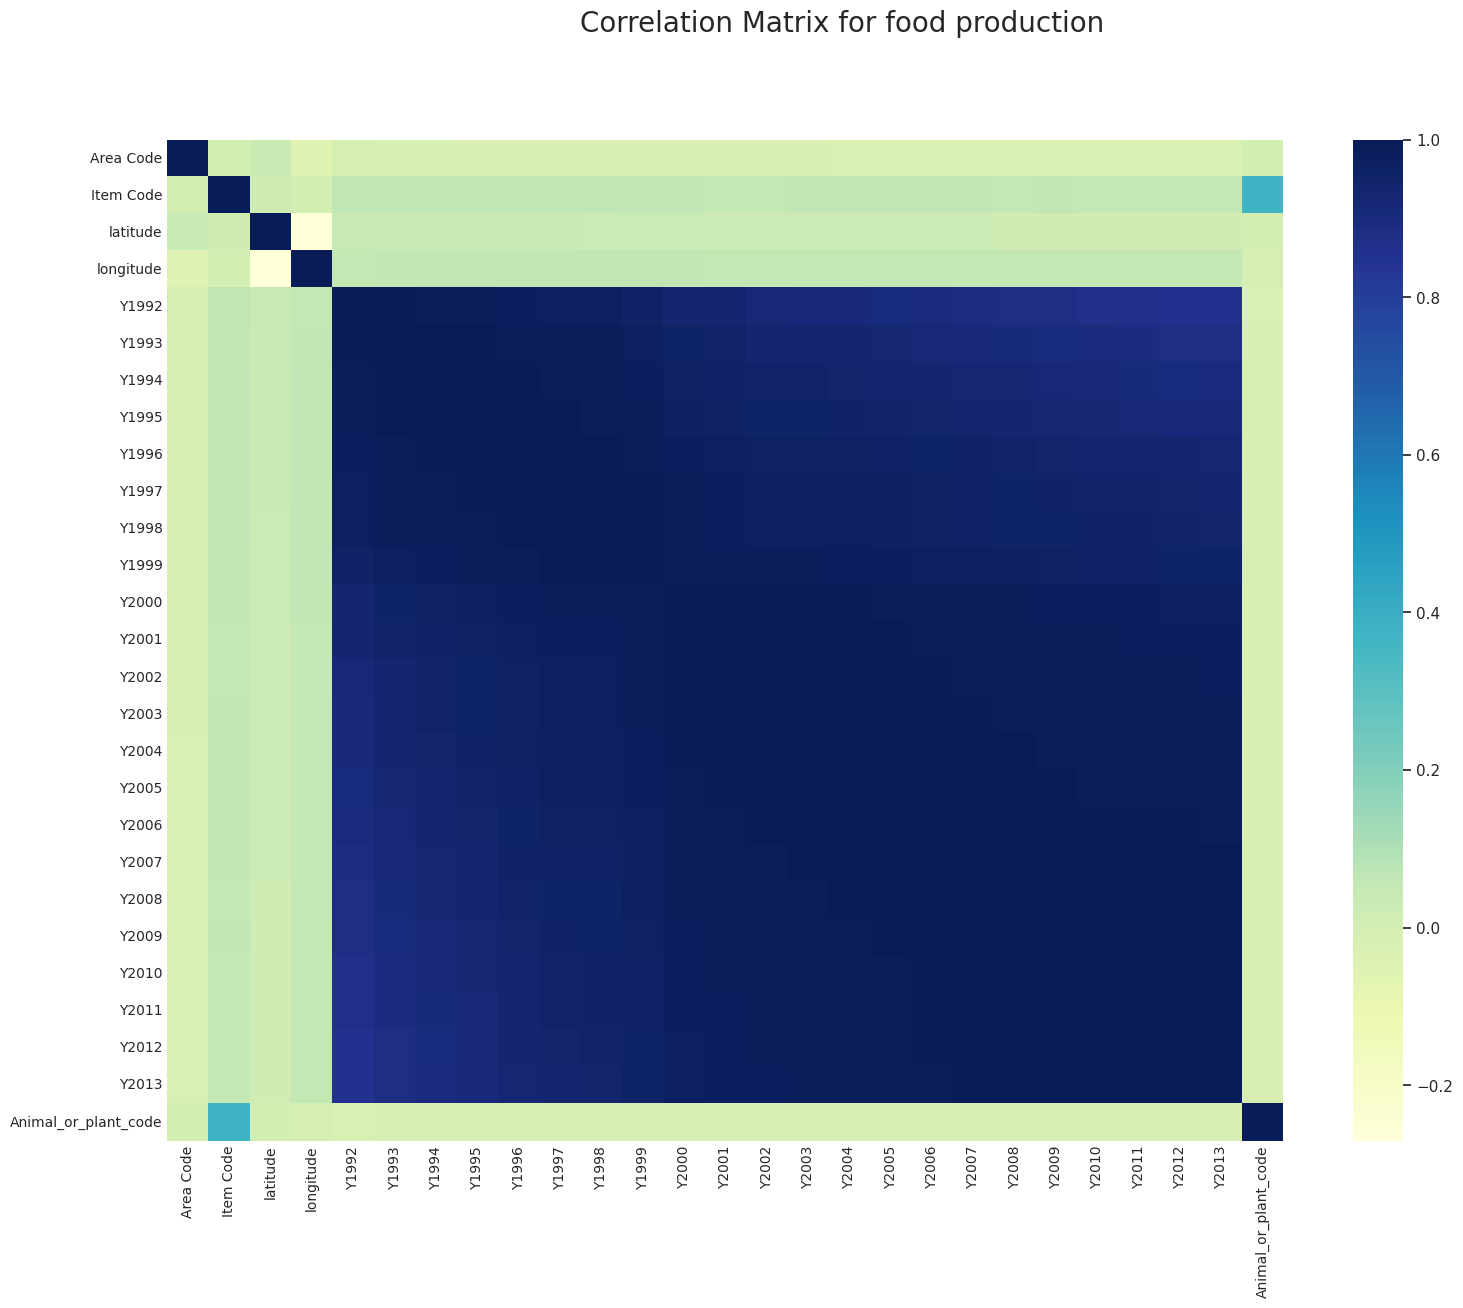

In [27]:
# plot heatmap
plt.subplots(figsize = (18,13))
sns.set(font_scale = 1)

hmap = sns.heatmap(data = prod_numeric_reduced_vars.corr(),
                cmap = "YlGnBu"
            )

plt.suptitle("Correlation Matrix for food production", fontsize = 20)

In [28]:
# transform null values - filled in remaining null values with the median production for that year.
# could also try - median of type of food produced, or median based on similar countries

# replace NAs
prod_numeric_cleaned1 = prod_numeric_reduced_vars.apply(lambda x: x.fillna(x.median()),axis=0)

rslt = prod_numeric_cleaned1.isnull().sum()

print(f'After median values applied: \n {rslt}')

# ref 4

After median values applied: 
 Area Code               0
Item Code               0
latitude                0
longitude               0
Y1992                   0
Y1993                   0
Y1994                   0
Y1995                   0
Y1996                   0
Y1997                   0
Y1998                   0
Y1999                   0
Y2000                   0
Y2001                   0
Y2002                   0
Y2003                   0
Y2004                   0
Y2005                   0
Y2006                   0
Y2007                   0
Y2008                   0
Y2009                   0
Y2010                   0
Y2011                   0
Y2012                   0
Y2013                   0
Animal_or_plant_code    0
dtype: int64


Check the distribution of the features - (the chosen features are set as default features in function)

In [29]:
# original dist
f.feature_distribution(dat = prod_numeric_cleaned1, trans_dat='no')

In [30]:
# transformations - log transformation creates most normally distributed data

f.feature_distribution(dat = prod_numeric_cleaned1, trans_dat='yes', transformation = np.cbrt, tr = 'cbrt', colr = 'pink')

f.feature_distribution(dat = prod_numeric_cleaned1, trans_dat='yes', transformation = np.sqrt, tr = 'sqrt', colr = 'yellow')

f.feature_distribution(dat = prod_numeric_cleaned1, trans_dat='yes', transformation = np.log, tr = 'log', colr = 'lightblue')


In [31]:
# Data for food production is highly skewed with a small number of countries producing very large amounts of food and the 
# majority producing much smaller amounts - therefore would suit log transformation
variables = prod_numeric_cleaned1.loc[:, ['Y2012', 'Y2011', 'Y2006', 'Y2010', 'Y2000', 'Y2008', 'Y1997', 'Y2009', 'Y1995', 'Y2005', 
'Y2002', 'Y2003', 'Y1993', 'Y1992', 'Y2001', 'Y1999', 'Item Code', 'Animal_or_plant_code', 'Y1994']]

print(f"Maximum: {variables['Y1995'].max()}")
print(f"Mean: {variables['Y1995'].mean()}")
print(f"Median: {variables['Y1995'].median()}")
print(f"Minimum: {variables['Y1995'].min()}")

print(f"Maximum: {variables['Y2005'].max()}")
print(f"Mean: {variables['Y2005'].mean()}")
print(f"Median: {variables['Y2005'].median()}")
print(f"Minimum: {variables['Y2005'].min()}")

Maximum: 208137.0
Mean: 397.4084463625154
Median: 22.0
Minimum: 1.0
Maximum: 373694.0
Mean: 499.7277435265105
Median: 25.0
Minimum: 1.0


In [32]:
# Add log transformation columns for year columns

years = prod_numeric_cleaned1[10:-2]

for y in years:

    prod_numeric_cleaned1[f'{y}'] = np.log(prod_numeric_cleaned1[y])

prod_numeric_cleaned1.head()

# original dist graphs - using transformed data as input
#f.feature_distribution(dat = prod_numeric_cleaned1, trans_dat='no', folder = 'transformed_dist')

,Area Code,Item Code,latitude,longitude,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Animal_or_plant_code
0,0.693147,7.828436,3.524594,4.215234,7.366445,7.517521,7.525640,7.524561,7.685703,7.759187,...,8.156510,8.217169,8.334231,8.355145,8.420242,8.434898,8.457655,8.478452,8.495970,0.0
1,0.693147,7.939159,3.524594,4.215234,5.517453,5.384495,5.560682,5.765191,5.537334,5.786897,...,6.098074,6.302619,6.120297,6.194405,6.028279,6.091310,6.165418,6.052089,6.045005,0.0
3,0.693147,7.829233,3.524594,4.215234,4.787492,5.043425,4.962845,4.828314,4.927254,5.068904,...,3.761200,3.784190,3.871201,4.127134,4.007333,4.094345,4.276666,4.356709,4.488636,0.0
5,0.693147,7.829630,3.524594,4.215234,5.135798,5.605802,5.666427,5.736572,5.342334,5.153292,...,4.204693,4.406719,4.204693,4.234107,4.262680,4.406719,4.290459,4.343805,4.330733,0.0
6,0.693147,7.830823,3.524594,4.215234,2.890372,3.091042,2.995732,3.044522,2.833213,2.995732,...,3.044522,2.397895,2.944439,3.044522,2.890372,2.639057,2.639057,2.639057,2.484907,0.0


In [33]:
# see data distribution of transformed variables - looks better
variables = prod_numeric_cleaned1.loc[:, ['Y2012', 'Y2011', 'Y2006', 'Y2010', 'Y2000', 'Y2008', 'Y1997', 'Y2009', 'Y1995', 'Y2005', 
'Y2002', 'Y2003', 'Y1993', 'Y1992', 'Y2001', 'Y1999', 'Item Code', 'Animal_or_plant_code', 'Y1994']]

print(f"Maximum: {variables['Y1995'].max()}")
print(f"Mean: {variables['Y1995'].mean()}")
print(f"Median: {variables['Y1995'].median()}")
print(f"Minimum: {variables['Y1995'].min()}")

print(f"Maximum: {variables['Y2005'].max()}")
print(f"Mean: {variables['Y2005'].mean()}")
print(f"Median: {variables['Y2005'].median()}")
print(f"Minimum: {variables['Y2005'].min()}")

Maximum: 12.245951795712363
Mean: 3.2561828531224104
Median: 3.091042453358316
Minimum: 0.0
Maximum: 12.831192559685062
Mean: 3.3665346820934143
Median: 3.2188758248682006
Minimum: 0.0


# 4) Select and train model

4a) Summary of the theory behind the model

Linear regression

A statistical method of determing the relationship between 2 (univariate) or more (multivariate) variables.
X axis = the independent variable
y axis = the dependent variable (what we are trying to predict)

Equation:

y = a + bX + u

- y = dependent variable
- x = independent variable
- a = intercept
- b = slope
- u = regression residual

Assumptions:
- The variables should have a linear relationship
- Variables are normally distributed
- Error term has a constant variance
- The features significantly explain the target variable (low p-values)
- Features are independent of each other (low correlation between chosen features)

Challenges:
- If relationship between variables is not linear then conclusions drawn become null and void
- If assumptions aren't correct, model conclusions will also be wrong. e.g. collinearity (predictor variables correlated) or heteroscedasticity (non-constant variance of error term)
- Greatly affected by the presence of outliers


ref # 11

4b) Evaluate the results using appropriate metrics with explanation of the metrics

## Use Forward Feature Selection to pick a good model

In [34]:
# Predictor variables
X = prod_numeric_cleaned1.drop('Y2013', axis=1)

# Target variable - production in 2013
y = prod_numeric_cleaned1['Y2013']

In [35]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [36]:
X_test.head()

,Area Code,Item Code,latitude,longitude,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Animal_or_plant_code
14431,5.068904,7.924434,2.206074,2.161022,3.367296,3.218876,3.433987,3.912023,3.637586,3.401197,...,3.637586,3.433987,3.713572,3.465736,3.806662,4.477337,3.912023,3.988984,3.988984,0.0
3608,3.610918,7.928406,1.888584,3.041661,3.135494,3.135494,3.113515,3.091042,3.135494,3.135494,...,3.178054,3.218876,3.218876,3.258097,3.258097,3.258097,3.295837,3.332205,3.295837,0.0
2164,2.944439,7.939159,3.165475,3.570377,4.941642,4.905275,5.030438,5.081404,5.209486,5.220356,...,5.472271,5.545177,5.627621,5.472271,5.476464,5.533389,5.583496,5.598422,5.645447,0.0
1064,2.397895,7.978996,3.861151,2.677591,7.039660,7.170888,7.101676,6.864848,6.679599,6.863803,...,7.052721,7.076654,7.084226,7.126087,7.175490,6.996681,7.001246,7.180831,7.188413,0.0
13166,4.962845,7.915713,3.459152,3.570377,3.761200,3.663562,3.761200,3.555348,3.737670,3.583519,...,3.912023,4.043051,4.077537,3.871201,4.094345,3.988984,3.988984,3.970292,4.127134,0.0


In [37]:
y_test.iloc[0:5]

14431    3.988984
3608     3.332205
2164     5.662960
1064     7.177019
13166    4.204693
Name: Y2013, dtype: float64

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11354, 26)
(11354,)
(4866, 26)
(4866,)


In [39]:
f.feature_selection_func(X, X_train, y_train)


(Step) Excluded = Animal_or_plant_code, Item Code, Y2001, Y1992, Y2002, Area Code, Y2006, Y1998, latitude, Y1997, Y2012, Y2009, Y2004, Y2010, Y1999, Y1996, Y2005, Y1993, Y2008, Y1994, Y2003, Y2000, Y2007, Y1995, Y2011, longitude
(Step) Trying Animal_or_plant_code...
(Step) - Features = Animal_or_plant_code
(Step) - Adjusted R^2: This = 0.007; Best = 0.000
(Step) - New Best!   : Feature = Animal_or_plant_code; R^2 = 0.008; Adjusted R^2 = 0.007
(Step) Trying Item Code...
(Step) - Features = Item Code
(Step) - Adjusted R^2: This = 0.031; Best = 0.007
(Step) - New Best!   : Feature = Item Code; R^2 = 0.031; Adjusted R^2 = 0.031
(Step) Trying Y2001...
(Step) - Features = Y2001
(Step) - Adjusted R^2: This = 0.772; Best = 0.031
(Step) - New Best!   : Feature = Y2001; R^2 = 0.772; Adjusted R^2 = 0.772
(Step) Trying Y1992...
(Step) - Features = Y1992
(Step) - Adjusted R^2: This = 0.659; Best = 0.772
(Step) Trying Y2002...
(Step) - Features = Y2002
(Step) - Adjusted R^2: This = 0.775; Best = 0.

# Now train the model with selected features

Feautures selected with forward feature selection:
- Features = Y2012, Y2011, Y2006, Y2010, Y2000, Y2008, Y1997, Y2009, Y1995, Y2005, Y2002, Y2003, Y1993, Y1992, Y2001, Y1999, Item Code, Animal_or_plant_code, Y1994

Years before 1992 had more than 40% missing values - These columns were removed using missing value ratio method before doing feature selection

In [40]:
# Predictor variables

X = prod_numeric_cleaned1.loc[:, ['Y2012', 'Y2011', 'Y2006', 'Y2010', 'Y2000', 'Y2008', 'Y1997', 'Y2009', 'Y1995', 'Y2005', 
'Y2002', 'Y2003', 'Y1993', 'Y1992', 'Y2001', 'Y1999', 'Item Code', 'Animal_or_plant_code', 'Y1994']]

# Target variable - production in 2013
y = prod_numeric_cleaned1['Y2013']



In [41]:
X.head()

,Y2012,Y2011,Y2006,Y2010,Y2000,Y2008,Y1997,Y2009,Y1995,Y2005,Y2002,Y2003,Y1993,Y1992,Y2001,Y1999,Item Code,Animal_or_plant_code,Y1994
0,8.478452,8.457655,8.217169,8.434898,7.863267,8.355145,7.759187,8.420242,7.524561,8.156510,7.928766,8.037543,7.517521,7.366445,7.889084,7.809135,7.828436,0.0,7.525640
1,6.052089,6.165418,6.302619,6.091310,5.918894,6.194405,5.786897,6.028279,5.765191,6.098074,6.104793,6.131226,5.384495,5.517453,6.018593,5.598422,7.939159,0.0,5.560682
3,4.356709,4.276666,3.784190,4.094345,4.430817,4.127134,5.068904,4.007333,4.828314,3.761200,4.804021,4.969813,5.043425,4.787492,4.418841,4.948760,7.829233,0.0,4.962845
5,4.343805,4.290459,4.406719,4.406719,4.189655,4.234107,5.153292,4.262680,5.736572,4.204693,5.135798,4.762174,5.605802,5.135798,4.532599,4.948760,7.829630,0.0,5.666427
6,2.639057,2.639057,2.397895,2.639057,2.995732,3.044522,2.995732,2.890372,3.044522,3.044522,2.890372,2.772589,3.091042,2.890372,2.995732,2.833213,7.830823,0.0,2.995732


In [42]:
# Split the data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [43]:
# Create a model for Linear Regression
reg = LinearRegression()

# Fit the model with the Training data

reg.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data

print(f"R2 for training data: {reg.score(X_train, y_train)}")

# Calculate the score (R^2 for Regression) for Testing Data

print(f"R2 for test data: {reg.score(X_test, y_test)}")


R2 for training data: 0.9479224905965373
R2 for test data: 0.9391509616087864


In [44]:
# Make predictions using the model
# Predict what the production values would be in 2013 for the test dataset
# We know what they actually are too (in y_test)

y_pred = reg.predict(X_test)

y_pred

array([3.98343127, 3.32749065, 5.63989721, ..., 3.32774512, 5.33161693,
       6.31882594])

In [45]:
# The coefficients
#print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# ref 5

Mean squared error: 0.27
Coefficient of determination: 0.94


4c) Improve the model with either cross-validation, grid-search or regularisation
- Regularisation = works to avoid overfitting by impossing a penalty

lambda (ridge alphas)= tuning parameter - decides how much penalty to impose on the model's flexibility
lambda = 0 - the penalty term has no effect (estimates produced will be equal to least squares)
as lambda approaches infinity = increases the impact of the shrinkage penalty = and the coeffs will approach 0

- Increased flexibility of model = when the coefficients increase. To minimise ridge regression function the co-efficients need to be small. Which is why ridge regression keeps the coefficients from rising too high.


In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11354, 19)
(11354,)
(4866, 19)
(4866,)


In [47]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
ridgemodel = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200) #lambda in the slides

# Train the model with different regularisation strengths
for a in ridge_alphas:
    ridgemodel.set_params(alpha = a)
    ridgemodel.fit(X, y)
    coefs.append(ridgemodel.coef_)
    errors.append(mean_squared_error(ridgemodel.coef_, reg.coef_))

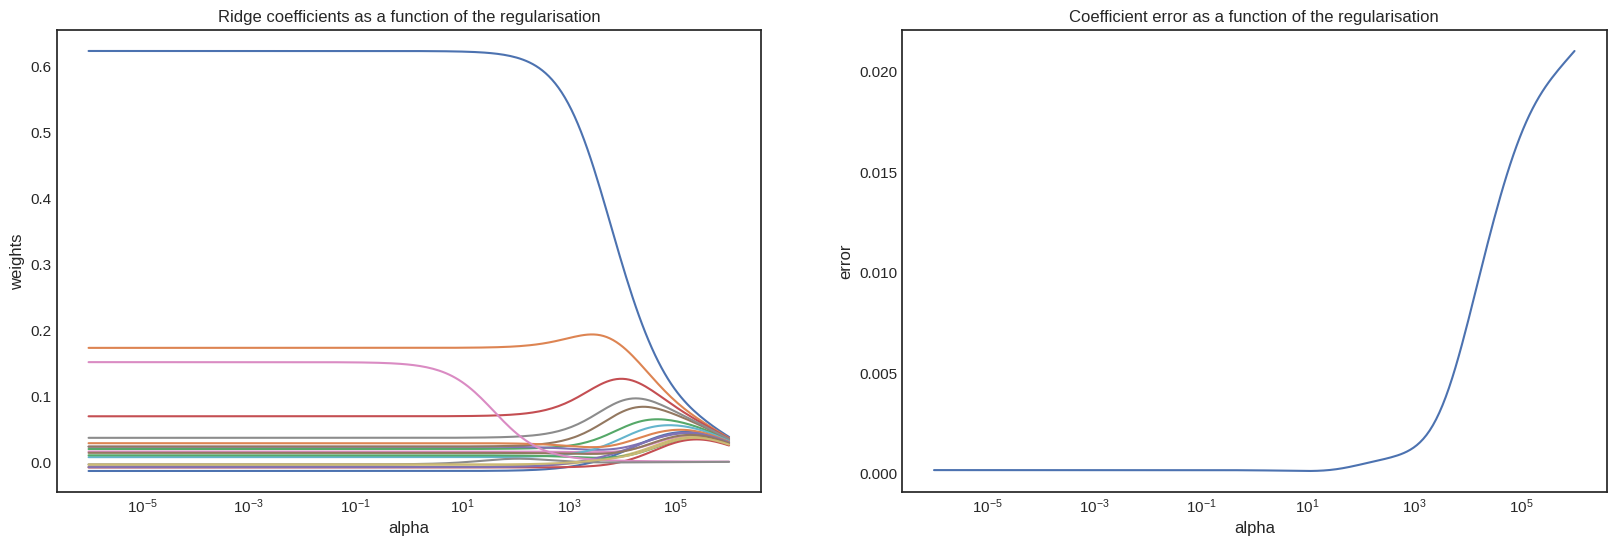

In [48]:
# View the results in graph form (from lab 4.4)

# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

- ridge alpha = from graph, 10 looks to be a good alpha value to try
- getting much higher than this the error is going up very quickly
- the blue ridge co-efficient appears to have a large impact on the model


In [49]:
# re-run model with alpha = 10
a = 10
ridge_model_10 = Ridge()
ridge_model_10.set_params(alpha = a)
ridge_model_10.fit(X_train, y_train)

Ridge(alpha=10)

In [50]:
# Is the new model better after using ridge regression?
# Calculate the new score (R^2 for Regression) for Training Data

print(f"R2 for training data: {ridge_model_10.score(X_train, y_train)}")

# Calculate the new score (R^2 for Regression) for Testing Data

print(f"R2 for test data: {ridge_model_10.score(X_test, y_test)}")

# Model performs the same as with linear regression

R2 for training data: 0.9479217562512914
R2 for test data: 0.9391586493358303


In [51]:
y_pred = ridge_model_10.predict(X_test)

# Mean squared error = the lower the better the model
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.27
Coefficient of determination: 0.94


# 5)Conclusion

- The type of food item, category of item (animal or plant), location and previous years production data can be used to estimate food production in 2013.

- The model looks to be a good estimator of food production (1000s tonnes) for a given food type in a given country/area.

- The model could be used to fill in all the missing values in the data set as well.

- It was found that 38.7% of the total data points were recorded as either 0s, NaNs or -ve production values. Therefore, the missing value ratio method was used to exclude features with more than 40% of data missing before feature selection occured.

- The data was transformed using logarithmic transformation due to the highly skewed nature of the data.

- Using forward feature selection, 19 features were selected for the model - 17 years of production data plus the item code and animal or plant code.

- A Linear regression model was used as production data is a continuous variable.

- The model appears to be a good model for predicting food production in 2013:
    - R2 value for training data: 0.958 
    - R2 value for test data: 0.939 
    - Coefficient of determination of 0.94
    - MSE of 0.27


- When using ridge regression with alpha = 10 or 100 - model performs the same as under linear regression. Using larger values (10000), started to see a slight drop in the R2 values. 
Appears that ridge regression does not improve the model in this case, suggesting overfitting has not occured.



# The data set
https://www.kaggle.com/datasets/dorbicycle/world-foodfeed-production

# References


1) https://www.fao.org/faostat/en/#home
2) https://datascience.stackexchange.com/questions/81490/encoding-categorical-data-with-pre-determined-dictionary
3) https://stackoverflow.com/questions/27965295/dropping-rows-from-dataframe-based-on-a-not-in-condition
4) https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
5) https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
6) https://sparkbyexamples.com/pandas/plot-distribution-of-column-values-in-pandas/
7) https://sparkbyexamples.com/pandas/pandas-get-column-names/
8) https://www.geeksforgeeks.org/replace-negative-number-by-zeros-in-pandas-dataframe/
9) https://stackoverflow.com/questions/44116194/import-a-function-from-another-ipynb-file
10) https://www.analyticsvidhya.com/blog/2021/04/beginners-guide-to-missing-value-ratio-and-its-implementation/
11) https://towardsdatascience.com/five-obstacles-faced-in-linear-regression-80fb5c599fbc